In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import random

def DensityMatrix(xList,yList,size=24):
    outMat = np.zeros((size,size))
    if len(xList) != len(yList):
        return outMat
    for i in range(len(xList)):
        xConvert = (xList[i]+180)//(360/24)
        yConvert = (yList[i]+180)//(360/24)
        if xConvert in range(size) and yConvert in range(size):
            outMat[int(xConvert),int(yConvert)] += 1
    return outMat/len(xList)


In [2]:
dihAngle_SEP = np.loadtxt("phipsi_SEP.dat",skiprows=1)
dihAngle_SEP_CMAP = np.loadtxt("phipsi_SEP_CMAP.dat",skiprows=1)
dihAngle_SEP_D = np.loadtxt("phipsi_SEP_D.dat",skiprows=1)
dihAngle_SEP_D_CMAP = np.loadtxt("phipsi_SEP_D_CMAP.dat",skiprows=1)

dihAngle_TPO = np.loadtxt("phipsi_TPO.dat",skiprows=1)
dihAngle_TPO_CMAP = np.loadtxt("phipsi_TPO_CMAP.dat",skiprows=1)
dihAngle_TPO_D = np.loadtxt("phipsi_TPO_D.dat",skiprows=1)
dihAngle_TPO_D_CMAP = np.loadtxt("phipsi_TPO_D_CMAP.dat",skiprows=1)

dihAngle_PTR = np.loadtxt("phipsi_PTR.dat",skiprows=1)
dihAngle_PTR_CMAP = np.loadtxt("phipsi_PTR_CMAP.dat",skiprows=1)
dihAngle_PTR_D = np.loadtxt("phipsi_PTR_D.dat",skiprows=1)
dihAngle_PTR_D_CMAP = np.loadtxt("phipsi_PTR_D_CMAP.dat",skiprows=1)

dihAngle_TYR = np.loadtxt("phipsi_TYR.dat",skiprows=1)

dihAngle_SEP_PDB = np.loadtxt("phi_psi_SEP_PDB.txt",skiprows=1)
dihAngle_TPO_PDB = np.loadtxt("phi_psi_TPO_PDB.txt",skiprows=1)
dihAngle_PTR_PDB = np.loadtxt("phi_psi_PTR_PDB.txt",skiprows=1)

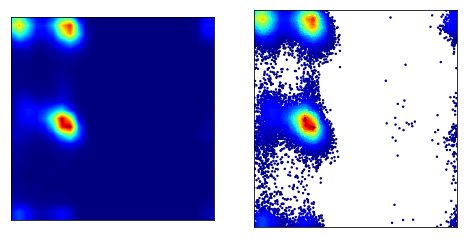

In [3]:
dMapSEP = np.flipud(DensityMatrix(dihAngle_SEP[:,1],dihAngle_SEP[:,2]).T)

cubic = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapSEP)

x_new = np.arange(0,360,0.1)
y_new = np.arange(0,360,0.1)
cubic_plot1 = cubic(x_new, y_new)


cubic_plot = ()
for i in range(dihAngle_SEP.shape[0]):
    cubic_plot = cubic_plot+(cubic(dihAngle_SEP[i,1]+180,-dihAngle_SEP[i,2]+180)[0],)


plt.subplots(figsize=(8,4))

plt.subplot(121)
plt.imshow(cubic_plot1,cmap="jet")

plt.xticks([])
plt.yticks([])


plt.subplot(122)
plt.scatter(dihAngle_SEP[:,1],dihAngle_SEP[:,2],s=2,c=cubic_plot,cmap="jet")
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.xticks([])
plt.yticks([])

plt.show()


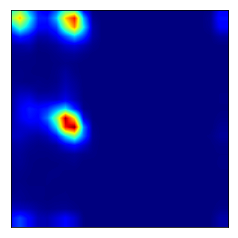

In [4]:
dMapSEP = np.flipud(DensityMatrix(dihAngle_SEP[:,1],dihAngle_SEP[:,2]).T)

cubic = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapSEP)
cubic_plot = [float(cubic(dihAngle_SEP[i,1]+180,-dihAngle_SEP[i,2]+180)) for i in range(dihAngle_SEP.shape[0])]

x_new = np.arange(0,360,0.1)
y_new = np.arange(0,360,0.1)
cubic_plot2 = cubic(x_new, y_new)

plt.subplots(figsize=(4,4))

plt.scatter(dihAngle_SEP[:,1],dihAngle_SEP[:,2],s=1,c=cubic_plot,cmap="jet")
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.xticks([])
plt.yticks([])

plt.savefig("SEP.png",dpi=200)

plt.close()

plt.subplots(figsize=(4,4))
plt.imshow(cubic_plot1,cmap="jet")
plt.xticks([])
plt.yticks([])
plt.savefig("SEP2.png",dpi=200)


plt.show()

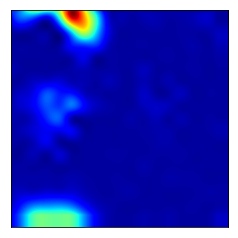

In [5]:
# TALOS-N data
data = np.array([0.041,0.013,0.005,0.000,0.000,0.000,0.003,0.001,0.008,0.003,0.000,0.000,0.010,0.000,0.000,0.000,0.023,0.076,0.107,0.049,0.013,0.004,0.002,0.000,0.000,0.010,0.004,0.020,0.016,0.003,0.000,0.000,0.000,0.000,0.068,0.135,0.194,0.076,0.010,0.004,0.000,0.009,0.013,0.023,0.022,0.041,0.036,0.015,0.000,0.000,0.000,0.000,0.033,0.260,0.202,0.082,0.016,0.004,0.000,0.000,0.031,0.034,0.064,0.078,0.081,0.021,0.000,0.000,0.000,0.000,0.000,0.234,0.198,0.085,0.013,0.003,0.000,0.020,0.000,0.034,0.081,0.064,0.053,0.023,0.000,0.000,0.000,0.000,0.121,0.254,0.195,0.069,0.017,0.007,0.000,0.000,0.000,0.035,0.008,0.093,0.051,0.008,0.004,0.007,0.048,0.119,0.344,0.402,0.111,0.033,0.008,0.003,0.000,0.000,0.000,0.000,0.000,0.043,0.015,0.008,0.009,0.030,0.064,0.237,0.329,0.290,0.037,0.010,0.002,0.001,0.000,0.000,0.000,0.000,0.000,0.013,0.004,0.001,0.001,0.001,0.065,0.139,0.179,0.098,0.006,0.003,0.000,0.001,0.000,0.002,0.000,0.000,0.000,0.004,0.000,0.009,0.002,0.002,0.014,0.032,0.028,0.011,0.000,0.001,0.003,0.002,0.001,0.002,0.000,0.000,0.000,0.000,0.000,0.002,0.001,0.001,0.001,0.000,0.005,0.001,0.001,0.000,0.004,0.000,0.000,0.001,0.001,0.001,0.005,0.000,0.000,0.000,0.001,0.001,0.001,0.000,0.000,0.004,0.005,0.000,0.000,0.001,0.005,0.001,0.001,0.002,0.002,0.011,0.015,0.008,0.011,0.000,0.002,0.000,0.005,0.007,0.002,0.000,0.000,0.000,0.000,0.002,0.004,0.005,0.010,0.015,0.000,0.000,0.000,0.001,0.000,0.001,0.007,0.000,0.005,0.000,0.000,0.004,0.001,0.002,0.005,0.005,0.000,0.010,0.001,0.007,0.001,0.003,0.001,0.000,0.001,0.005,0.001,0.000,0.000,0.003,0.001,0.003,0.000,0.000,0.007,0.000,0.012,0.000,0.000,0.000,0.001,0.002,0.003,0.005,0.001,0.002,0.001,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.002,0.005,0.002,0.007,0.000,0.000,0.001,0.003,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.015,0.004,0.014,0.002,0.003,0.000,0.000,0.000,0.000,0.006,0.001,0.000,0.000,0.000,0.001,0.003,0.008,0.012,0.000,0.009])

data = data.reshape((18,18)).T
data = np.flip(data,0)


cubic = interpolate.interp2d(np.arange(0,360,20),np.arange(0,360,20),data, kind='cubic')
x_new = np.arange(0,360,0.1)
y_new = np.arange(0,360,0.1)
cubic_plot = cubic(x_new, y_new)

plt.subplots(figsize=(4,4))

plt.imshow(cubic_plot,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.savefig("SEP_TALOS.png",dpi=200)
plt.show()

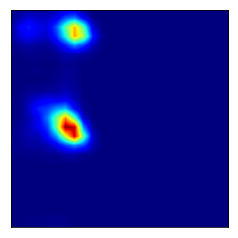

In [6]:
dMapTPO = np.flipud(DensityMatrix(dihAngle_TPO[:,1],dihAngle_TPO[:,2]).T)

cubic = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapTPO)
cubic_plot = [float(cubic(dihAngle_TPO[i,1]+180,-dihAngle_TPO[i,2]+180)) for i in range(dihAngle_TPO.shape[0])]

x_new = np.arange(0,360,0.1)
y_new = np.arange(0,360,0.1)
cubic_plot2 = cubic(x_new, y_new)

plt.subplots(figsize=(4,4))

plt.scatter(dihAngle_TPO[:,1],dihAngle_TPO[:,2],s=1,c=cubic_plot,cmap="jet")
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.xticks([])
plt.yticks([])

plt.savefig("TPO.png",dpi=200)

plt.close()

plt.subplots(figsize=(4,4))
plt.imshow(cubic_plot2,cmap="jet")
plt.xticks([])
plt.yticks([])
plt.savefig("TPO2.png",dpi=200)


plt.show()

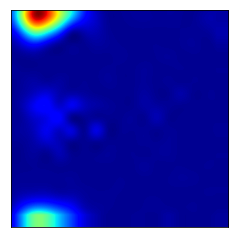

In [7]:
# TALOS-N data
data = np.array([0.037,0.009,0.002,0.000,0.000,0.000,0.001,0.001,0.004,0.003,0.000,0.000,0.005,0.000,0.007,0.038,0.077,0.096,0.132,0.042,0.008,0.002,0.000,0.000,0.002,0.006,0.007,0.014,0.007,0.004,0.000,0.000,0.028,0.111,0.240,0.250,0.224,0.064,0.010,0.002,0.001,0.004,0.011,0.019,0.025,0.042,0.021,0.008,0.000,0.002,0.047,0.199,0.399,0.429,0.208,0.062,0.010,0.002,0.000,0.000,0.022,0.038,0.037,0.050,0.030,0.004,0.000,0.000,0.021,0.155,0.351,0.397,0.140,0.046,0.005,0.002,0.001,0.013,0.014,0.021,0.047,0.024,0.011,0.006,0.000,0.000,0.000,0.075,0.229,0.261,0.082,0.032,0.006,0.003,0.000,0.000,0.000,0.030,0.000,0.038,0.010,0.000,0.000,0.000,0.000,0.003,0.108,0.166,0.034,0.010,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.018,0.006,0.001,0.000,0.000,0.000,0.009,0.046,0.073,0.011,0.003,0.001,0.000,0.000,0.000,0.001,0.033,0.003,0.008,0.001,0.000,0.000,0.000,0.005,0.013,0.022,0.018,0.000,0.002,0.001,0.000,0.000,0.003,0.000,0.000,0.000,0.003,0.000,0.003,0.002,0.000,0.003,0.003,0.002,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.001,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.003,0.001,0.001,0.000,0.000,0.004,0.000,0.002,0.002,0.000,0.007,0.006,0.003,0.003,0.000,0.000,0.000,0.003,0.004,0.000,0.002,0.000,0.000,0.000,0.002,0.001,0.000,0.013,0.006,0.000,0.000,0.000,0.001,0.001,0.000,0.002,0.000,0.007,0.000,0.000,0.001,0.000,0.003,0.003,0.002,0.000,0.002,0.000,0.002,0.000,0.003,0.000,0.000,0.002,0.003,0.000,0.000,0.000,0.003,0.001,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.001,0.000,0.001,0.001,0.001,0.002,0.000,0.001,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.003,0.002,0.001,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.008,0.003,0.004,0.000,0.001,0.000,0.000,0.001,0.000,0.002,0.000,0.000,0.000,0.000,0.001,0.000,0.004,0.011,0.008,0.011])

data = data.reshape((18,18)).T
data = np.flip(data,0)


cubic = interpolate.interp2d(np.arange(0,360,20),np.arange(0,360,20),data, kind='cubic')
x_new = np.arange(0,360,0.1)
y_new = np.arange(0,360,0.1)
cubic_plot = cubic(x_new, y_new)

plt.subplots(figsize=(4,4))

plt.imshow(cubic_plot,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.savefig("TPO_TALOS.png",dpi=200)
plt.show()

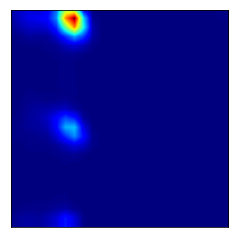

In [8]:
dMapPTR = np.flipud(DensityMatrix(dihAngle_PTR[:,1],dihAngle_PTR[:,2]).T)

cubic = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapPTR)
cubic_plot = [float(cubic(dihAngle_PTR[i,1]+180,-dihAngle_PTR[i,2]+180)) for i in range(dihAngle_PTR.shape[0])]

x_new = np.arange(0,360,0.1)
y_new = np.arange(0,360,0.1)
cubic_plot2 = cubic(x_new, y_new)

plt.subplots(figsize=(4,4))

plt.scatter(dihAngle_PTR[:,1],dihAngle_PTR[:,2],s=1,c=cubic_plot,cmap="jet")
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.xticks([])
plt.yticks([])

plt.savefig("PTR.png",dpi=200)

plt.close()

plt.subplots(figsize=(4,4))
plt.imshow(cubic_plot2,cmap="jet")
plt.xticks([])
plt.yticks([])
plt.savefig("PTR2.png",dpi=200)


plt.show()

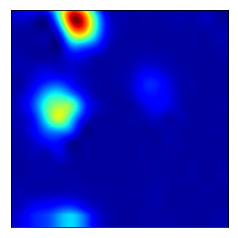

In [9]:
# TALOS-N data
data = np.array([0.013,0.006,0.002,0.000,0.000,0.000,0.000,0.001,0.002,0.003,0.001,0.001,0.004,0.003,0.001,0.000,0.009,0.017,0.025,0.011,0.005,0.002,0.000,0.002,0.004,0.009,0.011,0.020,0.014,0.005,0.006,0.004,0.000,0.000,0.010,0.029,0.045,0.021,0.003,0.003,0.003,0.007,0.016,0.032,0.045,0.065,0.047,0.024,0.012,0.000,0.000,0.000,0.000,0.047,0.055,0.025,0.005,0.003,0.004,0.006,0.033,0.073,0.133,0.142,0.100,0.043,0.018,0.000,0.000,0.000,0.000,0.065,0.087,0.031,0.005,0.003,0.003,0.019,0.034,0.091,0.198,0.177,0.114,0.048,0.012,0.004,0.000,0.037,0.117,0.148,0.107,0.033,0.006,0.004,0.000,0.002,0.000,0.063,0.113,0.156,0.076,0.027,0.014,0.023,0.079,0.201,0.308,0.246,0.072,0.016,0.004,0.000,0.000,0.000,0.000,0.000,0.031,0.057,0.028,0.010,0.006,0.021,0.078,0.227,0.293,0.199,0.024,0.006,0.002,0.000,0.000,0.000,0.000,0.000,0.002,0.014,0.004,0.002,0.001,0.006,0.049,0.112,0.133,0.075,0.005,0.002,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.001,0.001,0.001,0.011,0.024,0.025,0.010,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.003,0.001,0.001,0.004,0.005,0.003,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.003,0.002,0.012,0.013,0.009,0.003,0.001,0.000,0.001,0.001,0.002,0.002,0.002,0.001,0.002,0.001,0.002,0.000,0.005,0.018,0.035,0.040,0.021,0.007,0.002,0.001,0.002,0.002,0.002,0.004,0.004,0.002,0.001,0.001,0.000,0.001,0.013,0.030,0.037,0.041,0.019,0.006,0.001,0.000,0.001,0.001,0.003,0.000,0.001,0.001,0.000,0.002,0.003,0.004,0.003,0.022,0.024,0.021,0.008,0.004,0.001,0.001,0.003,0.002,0.001,0.000,0.000,0.001,0.000,0.001,0.002,0.001,0.006,0.006,0.006,0.004,0.004,0.000,0.001,0.000,0.004,0.003,0.000,0.001,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.002,0.001,0.000,0.001,0.001,0.003,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.008,0.002,0.004,0.000,0.000,0.002,0.001,0.000,0.000,0.001,0.000,0.002,0.000,0.001,0.000,0.001,0.004,0.005,0.000,0.000])

data = data.reshape((18,18)).T
data = np.flip(data,0)


cubic = interpolate.interp2d(np.arange(0,360,20),np.arange(0,360,20),data, kind='cubic')
x_new = np.arange(0,360,0.1)
y_new = np.arange(0,360,0.1)
cubic_plot = cubic(x_new, y_new)

plt.subplots(figsize=(4,4))

plt.imshow(cubic_plot,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.savefig("PTR_TALOS.png",dpi=200)
plt.show()

In [29]:
talosSEP = np.array([0.041,0.013,0.005,0.000,0.000,0.000,0.003,0.001,0.008,0.003,0.000,0.000,0.010,0.000,0.000,0.000,0.023,0.076,0.107,0.049,0.013,0.004,0.002,0.000,0.000,0.010,0.004,0.020,0.016,0.003,0.000,0.000,0.000,0.000,0.068,0.135,0.194,0.076,0.010,0.004,0.000,0.009,0.013,0.023,0.022,0.041,0.036,0.015,0.000,0.000,0.000,0.000,0.033,0.260,0.202,0.082,0.016,0.004,0.000,0.000,0.031,0.034,0.064,0.078,0.081,0.021,0.000,0.000,0.000,0.000,0.000,0.234,0.198,0.085,0.013,0.003,0.000,0.020,0.000,0.034,0.081,0.064,0.053,0.023,0.000,0.000,0.000,0.000,0.121,0.254,0.195,0.069,0.017,0.007,0.000,0.000,0.000,0.035,0.008,0.093,0.051,0.008,0.004,0.007,0.048,0.119,0.344,0.402,0.111,0.033,0.008,0.003,0.000,0.000,0.000,0.000,0.000,0.043,0.015,0.008,0.009,0.030,0.064,0.237,0.329,0.290,0.037,0.010,0.002,0.001,0.000,0.000,0.000,0.000,0.000,0.013,0.004,0.001,0.001,0.001,0.065,0.139,0.179,0.098,0.006,0.003,0.000,0.001,0.000,0.002,0.000,0.000,0.000,0.004,0.000,0.009,0.002,0.002,0.014,0.032,0.028,0.011,0.000,0.001,0.003,0.002,0.001,0.002,0.000,0.000,0.000,0.000,0.000,0.002,0.001,0.001,0.001,0.000,0.005,0.001,0.001,0.000,0.004,0.000,0.000,0.001,0.001,0.001,0.005,0.000,0.000,0.000,0.001,0.001,0.001,0.000,0.000,0.004,0.005,0.000,0.000,0.001,0.005,0.001,0.001,0.002,0.002,0.011,0.015,0.008,0.011,0.000,0.002,0.000,0.005,0.007,0.002,0.000,0.000,0.000,0.000,0.002,0.004,0.005,0.010,0.015,0.000,0.000,0.000,0.001,0.000,0.001,0.007,0.000,0.005,0.000,0.000,0.004,0.001,0.002,0.005,0.005,0.000,0.010,0.001,0.007,0.001,0.003,0.001,0.000,0.001,0.005,0.001,0.000,0.000,0.003,0.001,0.003,0.000,0.000,0.007,0.000,0.012,0.000,0.000,0.000,0.001,0.002,0.003,0.005,0.001,0.002,0.001,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.002,0.005,0.002,0.007,0.000,0.000,0.001,0.003,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.015,0.004,0.014,0.002,0.003,0.000,0.000,0.000,0.000,0.006,0.001,0.000,0.000,0.000,0.001,0.003,0.008,0.012,0.000,0.009])

talosTPO = np.array([0.037,0.009,0.002,0.000,0.000,0.000,0.001,0.001,0.004,0.003,0.000,0.000,0.005,0.000,0.007,0.038,0.077,0.096,0.132,0.042,0.008,0.002,0.000,0.000,0.002,0.006,0.007,0.014,0.007,0.004,0.000,0.000,0.028,0.111,0.240,0.250,0.224,0.064,0.010,0.002,0.001,0.004,0.011,0.019,0.025,0.042,0.021,0.008,0.000,0.002,0.047,0.199,0.399,0.429,0.208,0.062,0.010,0.002,0.000,0.000,0.022,0.038,0.037,0.050,0.030,0.004,0.000,0.000,0.021,0.155,0.351,0.397,0.140,0.046,0.005,0.002,0.001,0.013,0.014,0.021,0.047,0.024,0.011,0.006,0.000,0.000,0.000,0.075,0.229,0.261,0.082,0.032,0.006,0.003,0.000,0.000,0.000,0.030,0.000,0.038,0.010,0.000,0.000,0.000,0.000,0.003,0.108,0.166,0.034,0.010,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.018,0.006,0.001,0.000,0.000,0.000,0.009,0.046,0.073,0.011,0.003,0.001,0.000,0.000,0.000,0.001,0.033,0.003,0.008,0.001,0.000,0.000,0.000,0.005,0.013,0.022,0.018,0.000,0.002,0.001,0.000,0.000,0.003,0.000,0.000,0.000,0.003,0.000,0.003,0.002,0.000,0.003,0.003,0.002,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.001,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.003,0.001,0.001,0.000,0.000,0.004,0.000,0.002,0.002,0.000,0.007,0.006,0.003,0.003,0.000,0.000,0.000,0.003,0.004,0.000,0.002,0.000,0.000,0.000,0.002,0.001,0.000,0.013,0.006,0.000,0.000,0.000,0.001,0.001,0.000,0.002,0.000,0.007,0.000,0.000,0.001,0.000,0.003,0.003,0.002,0.000,0.002,0.000,0.002,0.000,0.003,0.000,0.000,0.002,0.003,0.000,0.000,0.000,0.003,0.001,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.001,0.000,0.001,0.001,0.001,0.002,0.000,0.001,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.003,0.002,0.001,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.008,0.003,0.004,0.000,0.001,0.000,0.000,0.001,0.000,0.002,0.000,0.000,0.000,0.000,0.001,0.000,0.004,0.011,0.008,0.011])

talosPTR = np.array([0.013,0.006,0.002,0.000,0.000,0.000,0.000,0.001,0.002,0.003,0.001,0.001,0.004,0.003,0.001,0.000,0.009,0.017,0.025,0.011,0.005,0.002,0.000,0.002,0.004,0.009,0.011,0.020,0.014,0.005,0.006,0.004,0.000,0.000,0.010,0.029,0.045,0.021,0.003,0.003,0.003,0.007,0.016,0.032,0.045,0.065,0.047,0.024,0.012,0.000,0.000,0.000,0.000,0.047,0.055,0.025,0.005,0.003,0.004,0.006,0.033,0.073,0.133,0.142,0.100,0.043,0.018,0.000,0.000,0.000,0.000,0.065,0.087,0.031,0.005,0.003,0.003,0.019,0.034,0.091,0.198,0.177,0.114,0.048,0.012,0.004,0.000,0.037,0.117,0.148,0.107,0.033,0.006,0.004,0.000,0.002,0.000,0.063,0.113,0.156,0.076,0.027,0.014,0.023,0.079,0.201,0.308,0.246,0.072,0.016,0.004,0.000,0.000,0.000,0.000,0.000,0.031,0.057,0.028,0.010,0.006,0.021,0.078,0.227,0.293,0.199,0.024,0.006,0.002,0.000,0.000,0.000,0.000,0.000,0.002,0.014,0.004,0.002,0.001,0.006,0.049,0.112,0.133,0.075,0.005,0.002,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.001,0.001,0.001,0.011,0.024,0.025,0.010,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.003,0.001,0.001,0.004,0.005,0.003,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.003,0.002,0.012,0.013,0.009,0.003,0.001,0.000,0.001,0.001,0.002,0.002,0.002,0.001,0.002,0.001,0.002,0.000,0.005,0.018,0.035,0.040,0.021,0.007,0.002,0.001,0.002,0.002,0.002,0.004,0.004,0.002,0.001,0.001,0.000,0.001,0.013,0.030,0.037,0.041,0.019,0.006,0.001,0.000,0.001,0.001,0.003,0.000,0.001,0.001,0.000,0.002,0.003,0.004,0.003,0.022,0.024,0.021,0.008,0.004,0.001,0.001,0.003,0.002,0.001,0.000,0.000,0.001,0.000,0.001,0.002,0.001,0.006,0.006,0.006,0.004,0.004,0.000,0.001,0.000,0.004,0.003,0.000,0.001,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.002,0.001,0.000,0.001,0.001,0.003,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.008,0.002,0.004,0.000,0.000,0.002,0.001,0.000,0.000,0.001,0.000,0.002,0.000,0.001,0.000,0.001,0.004,0.005,0.000,0.000])

In [30]:
x_new = np.arange(0,360,0.1)
y_new = np.arange(0,360,0.1)

talosSEP = np.flipud(talosSEP.reshape((18,18)).T)
cubicTalosSEP = interpolate.interp2d(np.arange(0,360,20),np.arange(0,360,20),talosSEP, kind='cubic')
cubicplotTalosSEP = cubicTalosSEP(x_new, y_new)

talosTPO = np.flipud(talosTPO.reshape((18,18)).T)
cubicTalosTPO = interpolate.interp2d(np.arange(0,360,20),np.arange(0,360,20),talosTPO, kind='cubic')
cubicplotTalosTPO = cubicTalosTPO(x_new, y_new)

talosPTR = np.flipud(talosPTR.reshape((18,18)).T)
cubicTalosPTR = interpolate.interp2d(np.arange(0,360,20),np.arange(0,360,20),talosPTR, kind='cubic')
cubicplotTalosPTR = cubicTalosPTR(x_new, y_new)


dMapSEP = np.flipud(DensityMatrix(dihAngle_SEP[:,1],dihAngle_SEP[:,2]).T)
cubicSEP = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapSEP)
cubicplotSEP = cubicSEP(x_new, y_new)

dMapTPO = np.flipud(DensityMatrix(dihAngle_TPO[:,1],dihAngle_TPO[:,2]).T)
cubicTPO = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapTPO)
cubicplotTPO = cubicTPO(x_new, y_new)

dMapPTR = np.flipud(DensityMatrix(dihAngle_PTR[:,1],dihAngle_PTR[:,2]).T)
cubicPTR = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapPTR)
cubicplotPTR = cubicPTR(x_new, y_new)


dMapSEPCMAP = np.flipud(DensityMatrix(dihAngle_SEP_CMAP[:,1],dihAngle_SEP_CMAP[:,2]).T)
cubicSEPCMAP = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapSEPCMAP)
cubicplotSEPCMAP = cubicSEPCMAP(x_new, y_new)

dMapTPOCMAP = np.flipud(DensityMatrix(dihAngle_TPO_CMAP[:,1],dihAngle_TPO_CMAP[:,2]).T)
cubicTPOCMAP = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapTPOCMAP)
cubicplotTPOCMAP = cubicTPOCMAP(x_new, y_new)

dMapPTRCMAP = np.flipud(DensityMatrix(dihAngle_PTR_CMAP[:,1],dihAngle_PTR_CMAP[:,2]).T)
cubicPTRCMAP = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapPTRCMAP)
cubicplotPTRCMAP = cubicPTRCMAP(x_new, y_new)


dMapSEPD = np.flipud(DensityMatrix(dihAngle_SEP_D[:,1],dihAngle_SEP_D[:,2]).T)
cubicSEPD = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapSEPD)
cubicplotSEPD = cubicSEPD(x_new, y_new)

dMapTPOD = np.flipud(DensityMatrix(dihAngle_TPO_D[:,1],dihAngle_TPO_D[:,2]).T)
cubicTPOD = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapTPOD)
cubicplotTPOD = cubicTPOD(x_new, y_new)

dMapPTRD = np.flipud(DensityMatrix(dihAngle_PTR_D[:,1],dihAngle_PTR_D[:,2]).T)
cubicPTRD = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapPTRD)
cubicplotPTRD = cubicPTRD(x_new, y_new)


dMapSEPDCMAP = np.flipud(DensityMatrix(dihAngle_SEP_D_CMAP[:,1],dihAngle_SEP_D_CMAP[:,2]).T)
cubicSEPDCMAP = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapSEPDCMAP)
cubicplotSEPDCMAP = cubicSEPDCMAP(x_new, y_new)

dMapTPODCMAP = np.flipud(DensityMatrix(dihAngle_TPO_D_CMAP[:,1],dihAngle_TPO_D_CMAP[:,2]).T)
cubicTPODCMAP = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapTPODCMAP)
cubicplotTPODCMAP = cubicTPODCMAP(x_new, y_new)

dMapPTRDCMAP = np.flipud(DensityMatrix(dihAngle_PTR_D_CMAP[:,1],dihAngle_PTR_D_CMAP[:,2]).T)
cubicPTRDCMAP = interpolate.interp2d(np.arange(0,360,15),np.arange(0,360,15),dMapPTRDCMAP)
cubicplotPTRDCMAP = cubicPTRDCMAP(x_new, y_new)

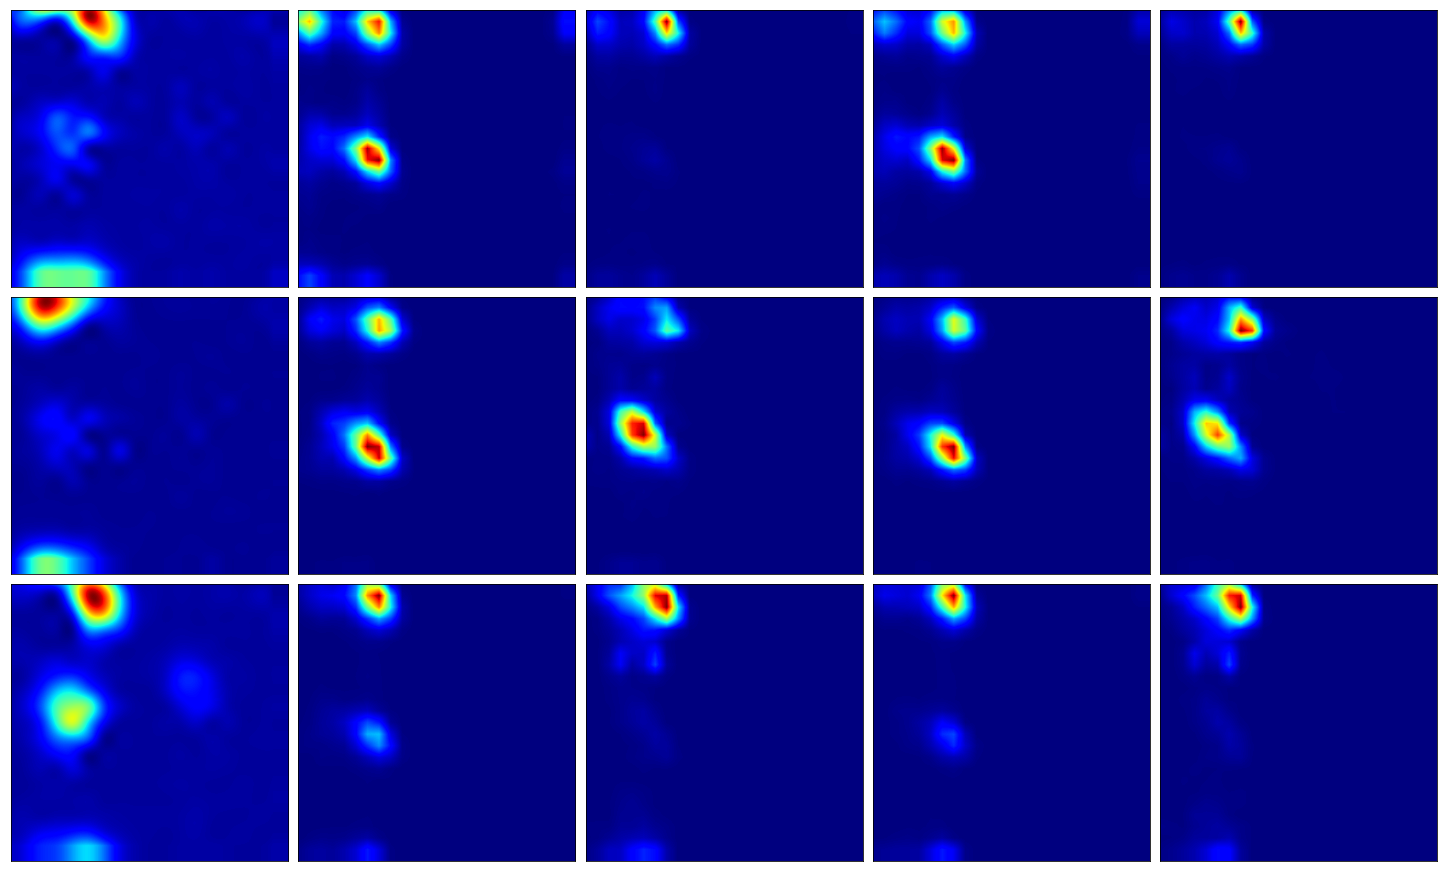

In [33]:
plt.subplots(figsize=(20,12))

plt.subplot(3,5,1)
plt.imshow(cubicplotTalosSEP,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,2)
plt.imshow(cubicplotSEP,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,3)
plt.imshow(cubicplotSEPCMAP,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,4)
plt.imshow(cubicplotSEPD,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,5)
plt.imshow(cubicplotSEPDCMAP,cmap="jet")
plt.xticks([])
plt.yticks([])


plt.subplot(3,5,6)
plt.imshow(cubicplotTalosTPO,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,7)
plt.imshow(cubicplotTPO,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,8)
plt.imshow(cubicplotTPOCMAP,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,9)
plt.imshow(cubicplotTPOD,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,10)
plt.imshow(cubicplotTPODCMAP,cmap="jet")
plt.xticks([])
plt.yticks([])


plt.subplot(3,5,11)
plt.imshow(cubicplotTalosPTR,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,12)
plt.imshow(cubicplotPTR,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,13)
plt.imshow(cubicplotPTRCMAP,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,14)
plt.imshow(cubicplotPTRD,cmap="jet")
plt.xticks([])
plt.yticks([])

plt.subplot(3,5,15)
plt.imshow(cubicplotPTRDCMAP,cmap="jet")
plt.xticks([])
plt.yticks([])


plt.tight_layout(pad=0.3)
plt.savefig("dipeptide.png",dpi=200)
plt.show()